# Image Processing Using Machine Learning
---

## Import Libraries

In [6]:
from skimage import io
from skimage import color
from skimage import data
from skimage import draw
from skimage import exposure
from skimage.transform import rotate
from skimage.transform import resize
from pylab import *
import sift
import cv2
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Feature Mapping Using the SIFT Algorithm

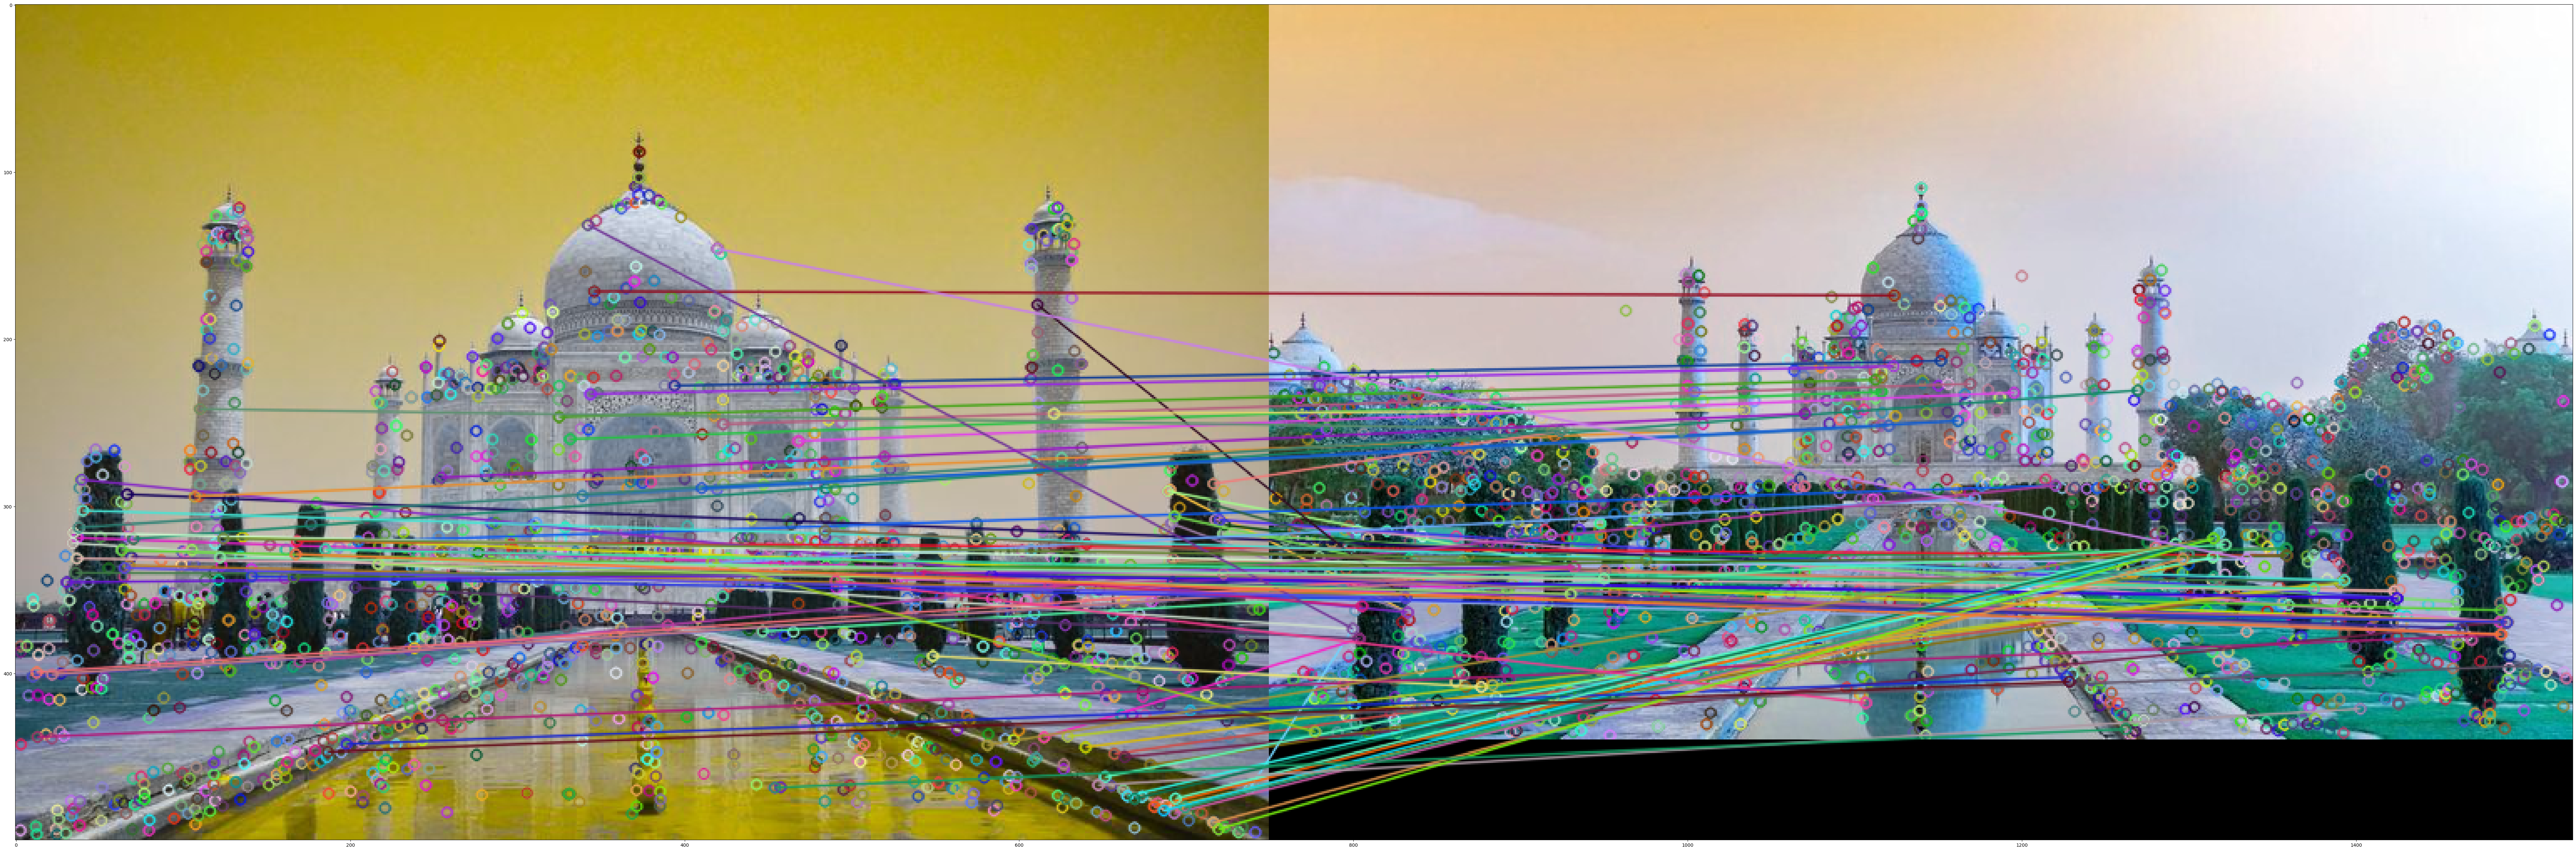

In [7]:
# Load images
Image1 = cv2.imread('Taj-Mahal.jpeg')
Image2 = cv2.imread('Taj-mahal2.jpeg')

# Convert to grayscale
Image1_gray = cv2.cvtColor(Image1, cv2.COLOR_BGR2GRAY)
Image2_gray = cv2.cvtColor(Image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
Image1_key_points, Image1_descriptors = sift.detectAndCompute(Image1_gray, None)
Image2_key_points, Image2_descriptors = sift.detectAndCompute(Image2_gray, None)

# Match descriptors using brute force
norm = cv2.NORM_L2
bruteForce = cv2.BFMatcher(norm)
matches = bruteForce.match(Image1_descriptors, Image2_descriptors)
matches = sorted(matches, key = lambda match:match.distance)
matched_img = cv2.drawMatches(
Image1, Image1_key_points,
Image2, Image2_key_points,
matches[:100], Image2.copy())

# Showing the Figure
plt.figure(figsize=(100,300))
plt.imshow(matched_img)

In [17]:
def extract_sift_features(img):
    sift_initialize = cv2.xfeatures2d.SIFT_create()
    key_points, descriptors = sift_initialize (img, None)
    return key_points, descriptors
def showing_sift_features(img1, img2, key_points):
    return plt.imshow(cv2.drawKeypoints(img1, key_points, img2.copy()))

In [9]:
Image1_gray = cv2.cvtColor(Image1, cv2.COLOR_BGR2GRAY)
Image2_gray = cv2.cvtColor(Image2, cv2.COLOR_BGR2GRAY)

In [15]:
sift_initialize = cv2.xfeatures2d.SIFT_create()

In [ ]:
key_points, descriptors = sift_initialize.detectAndCompute(img,None)

## Image Registration Using the RANSAC Algorithm

In [13]:
import numpy as np
import cv2
from skimage.measure import ransac
from affine import *
from align import *

In [14]:
img_source = cv2.imread("source.jpg")
img_target = cv2.imread("target.jpg")